In [1]:
pwd

'/Users/aidasaglinskas/Desktop/ABCD_ADHD'

In [166]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [152]:
#subjects_adhd = pd.read_csv('ABCD_ADHD_subjectIDs_N_1017.csv')
subjects_adhd = pd.read_csv('ABCD_NON_ADHD_subjectIDs_N_4021.csv')
subjects_adhd = subjects_adhd['subjectkey'].values
subjects_adhd.shape

(4021,)

In [153]:
fn = 'abcd_ksad01.csv'
df = pd.read_csv(fn,low_memory=False)
df.iloc[1::]

#df = df.iloc[df['eventname'].values=='baseline_year_1_arm_1']

df_baseline = df.iloc[df['eventname'].values=='baseline_year_1_arm_1']
df_1year = df.iloc[df['eventname'].values=='1_year_follow_up_y_arm_1']
df_2year = df.iloc[df['eventname'].values=='2_year_follow_up_y_arm_1']

print(df.shape)

(31196, 964)


In [154]:
cols_inatt = ['ksads_14_394_p','ksads_14_76_p','ksads_14_395_p','ksads_14_396_p','ksads_14_397_p','ksads_14_398_p','ksads_14_399_p','ksads_14_80_p','ksads_14_400_p']
cols_hyper = ['ksads_14_401_p','ksads_14_84_p','ksads_14_402_p','ksads_14_403_p','ksads_14_404_p','ksads_14_405_p','ksads_14_406_p','ksads_14_407_p','ksads_14_408_p']
cols_symp = ['ksads_14_394_p','ksads_14_76_p','ksads_14_395_p','ksads_14_396_p','ksads_14_397_p','ksads_14_398_p','ksads_14_399_p','ksads_14_80_p','ksads_14_400_p','ksads_14_401_p','ksads_14_84_p','ksads_14_402_p','ksads_14_403_p','ksads_14_404_p','ksads_14_405_p','ksads_14_406_p','ksads_14_407_p','ksads_14_408_p']
len(cols_symp)

18

In [182]:
print((pd.to_numeric(df_baseline['interview_age']).values.mean()/12).round(2))
print((pd.to_numeric(df_1year['interview_age']).values.mean()/12).round(2))
print((pd.to_numeric(df_2year['interview_age']).values.mean()/12).round(2))

9.92
10.93
12.0


In [156]:
df_baseline['subjectkey'].isin(subjects_adhd).sum()

4021

In [157]:
df_1year['subjectkey'].isin(subjects_adhd).sum()

3919

In [158]:
df_2year['subjectkey'].isin(subjects_adhd).sum()

3954

In [184]:
def get_symptom_mat(use_df,subjects_adhd,cols_symp):
    
    ns = len(subjects_adhd)
    nc = len(cols_symp)
    data = np.zeros((ns,nc))
    data.shape
    
    for s in tqdm(range(ns)):
        for c in range(nc):
            subID = subjects_adhd[s]
            arr = pd.to_numeric(use_df[use_df['subjectkey']==subID][cols_symp[c]]).values

            if len(arr) > 0:
                val = arr[0]==1
            else:
                val = np.nan

            data[s,c] = val
        
    return data

In [204]:
%%time
symptom_mat_T0 = get_symptom_mat(df_baseline,subjects_adhd,cols_symp)
symptom_mat_T1 = get_symptom_mat(df_1year,subjects_adhd,cols_symp)
symptom_mat_T2 = get_symptom_mat(df_2year,subjects_adhd,cols_symp)

100%|██████████████████████████████████████| 4021/4021 [00:32<00:00, 124.02it/s]

CPU times: user 1min 35s, sys: 1.33 s, total: 1min 36s
Wall time: 1min 36s


In [205]:
# %%time
# symptom_mat_T0 = get_symptom_mat(df_baseline,subjects_adhd,cols_hyper)
# symptom_mat_T1 = get_symptom_mat(df_1year,subjects_adhd,cols_hyper)
# symptom_mat_T2 = get_symptom_mat(df_2year,subjects_adhd,cols_hyper)

In [206]:
# %%time
# symptom_mat_T0 = get_symptom_mat(df_baseline,subjects_adhd,cols_inatt)
# symptom_mat_T1 = get_symptom_mat(df_1year,subjects_adhd,cols_inatt)
# symptom_mat_T2 = get_symptom_mat(df_2year,subjects_adhd,cols_inatt)

In [207]:
print(np.isnan(symptom_mat_T0).sum())
print(np.isnan(symptom_mat_T1).sum())
print(np.isnan(symptom_mat_T2).sum())

0
1836
1206


In [208]:
mat = np.array([symptom_mat_T0,symptom_mat_T2])
mat = mat[:,np.isnan(mat).sum(axis=0).sum(axis=-1)==0,:]
assert np.isnan(mat).sum()==0
mat.shape

(2, 3954, 18)

In [209]:
mat_sum = mat.sum(axis=-1)
mat_sum.shape

(2, 3954)

In [210]:
mat_diff = mat_sum[0,:]-mat_sum[1,:]

Text(0, 0.5, '# Subjects')

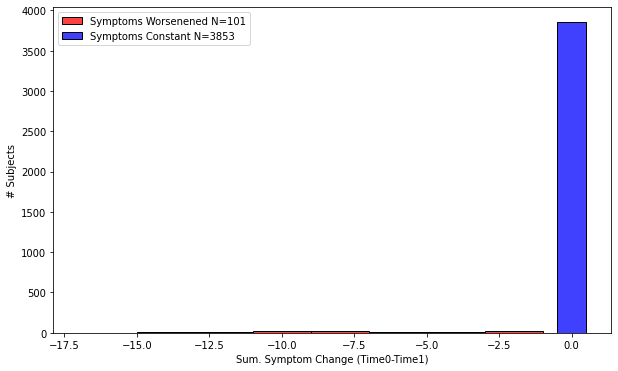

In [211]:
plt.figure(figsize=np.array((10,6))*1  )

mat_worse = mat_diff[mat_diff<0]
mat_stay = mat_diff[mat_diff==0]
mat_improve = mat_diff[mat_diff>0]
sns.histplot(mat_worse,color='r')
sns.histplot(mat_stay,color='b')
sns.histplot(mat_improve,color='g')

plt.legend([f'Symptoms Worsenened N={len(mat_worse)}',
            f'Symptoms Constant N={len(mat_stay)}',
            f'Symptoms Improved N={len(mat_improve)}'])

plt.xlabel('Sum. Symptom Change (Time0-Time1)')
plt.ylabel('# Subjects')